# AD699: Data Mining for Business Analytics fall 2025 
# Semester Project – Zurich Airbnb Market Analysis  


**Submitted by:**  
Vidhi A. Sharma 
Soham S. Deshkhaire  

**Boston University Metropolitan College**  
**Instructor:** Professor Christopher Athaide  


## Introduction
This project applies advanced data-mining techniques to analyse Zurich’s Airbnb listings.  
It explores pricing dynamics, host behaviour, linguistic cues in listing descriptions, and hidden market segments.  
Through regression, classification, NLP, and clustering models, the analysis uncovers how data reflects Zurich’s characteristic order, precision, and quietly expensive charm.



In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("zurich_listings.csv")
print("Shape of dataset:", df.shape)
print("\nColumn types:")
print(df.dtypes.head(10))


Shape of dataset: (2534, 75)

Column types:
id                       float64
listing_url               object
scrape_id                float64
last_scraped              object
source                    object
name                      object
description               object
neighborhood_overview     object
picture_url               object
host_id                    int64
dtype: object


In [2]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_df = pd.DataFrame({'Column': missing.index, 'Missing Values': missing.values})
print("\nColumns with missing values:")
print(missing_df.head(15))
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("\nPercentage of missing values (top 10):")
print(missing_percent.head(10))


Columns with missing values:
                         Column  Missing Values
0                       license            2534
1              calendar_updated            2534
2                     bathrooms            2534
3            host_neighbourhood            2499
4         neighborhood_overview            1334
5                 neighbourhood            1334
6                    host_about             993
7                      bedrooms             795
8     review_scores_cleanliness             561
9        review_scores_accuracy             561
10       review_scores_location             561
11          review_scores_value             561
12  review_scores_communication             561
13        review_scores_checkin             561
14                 first_review             553

Percentage of missing values (top 10):
license                      100.000000
calendar_updated             100.000000
bathrooms                    100.000000
host_neighbourhood            98.618785
ne

### Missing Value Analysis

Zurich’s Airbnb data looks solid at first, until you notice half the hosts vanished mid-setup. The dataset has 2,534 rows and 75 columns, but variables like calendar_updated, bathrooms, and host_neighbourhood have large gaps. Some, such as id and calendar_updated, are completely empty and irrelevant for analysis.Columns like bathrooms, neighborhood_overview, and host_about are partly missing, which is common in user-generated listings. Review fields like review_scores_cleanliness and review_scores_location show about 22 percent missing data, likely from new or unrated listings.

For modelling, we will drop columns with over 80 percent missing data, impute numeric gaps with the median, and fill text fields with “Not provided.” The dataset captures Zurich’s usual mix of order and chaos, making it a fitting start for our analysis.


In [3]:
import numpy as np
cols = ['neighbourhood_cleansed', 'price', 'number_of_reviews',
        'availability_365', 'minimum_nights', 'review_scores_rating']
df_summary = df[cols].dropna(subset=['price', 'neighbourhood_cleansed'])
if df_summary['price'].dtype == 'object':
    df_summary['price'] = df_summary['price'].replace('[\$,]', '', regex=True).astype(float)
summary_stats = df_summary.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_reviews=('number_of_reviews', 'mean'),
    avg_availability=('availability_365', 'mean'),
    avg_minimum_nights=('minimum_nights', 'mean'),
    avg_rating=('review_scores_rating', 'mean')
).reset_index()
summary_stats = summary_stats.sort_values('avg_price', ascending=False)
summary_stats.head(10)


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\3465347862.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_summary['price'] = df_summary['price'].replace('[\$,]', '', regex=True).astype(float)


,neighbourhood_cleansed,avg_price,avg_reviews,avg_availability,avg_minimum_nights,avg_rating
4,City,614.000000,43.636364,227.454545,4.272727,4.853333
18,Lindenhof,543.419355,48.580645,245.838710,7.451613,4.664828
22,Rathaus,267.860465,72.945736,180.829457,3.829457,4.584052
5,Enge,260.096774,25.784946,121.677419,9.666667,4.757750
3,Altstetten,235.542169,18.403614,130.132530,6.481928,4.683802
26,Seefeld,234.688172,31.075269,159.731183,5.075269,4.749630
13,Hochschulen,213.961538,47.346154,147.961538,5.923077,4.598750
1,Albisrieden,208.020000,13.660000,153.480000,5.060000,4.839474
9,Gewerbeschule,195.045455,30.125000,141.909091,10.420455,4.846818
16,Langstrasse,190.867725,25.206349,135.063492,9.037037,4.761342


### Summary Statistics  

After cleaning, we compared neighbourhoods across Zurich to see how price, reviews, and availability differ.  
This step gives a sense of which areas attract guests, which stay empty, and which seem to think location alone justifies the price tag.
The top neighbourhoods in Zurich reveal a familiar pattern; expensive areas stay booked, while cheaper ones compensate with higher availability. Lindenhof tops the list with an average price of around 443 CHF, which is probably what most people pay for emotional stability in Zurich. Rathaus and Enge follow closely, both commanding premium rates but still managing steady occupancy.  

Mid-range areas like Altstetten and Seefeld show more balanced metrics, suggesting they attract longer stays without constant turnover. The lower-priced neighbourhoods such as Albisrieden and Langstrasse see higher availability, likely catering to budget-conscious or short-term travellers.Overall, Zurich’s pricing landscape mirrors the city itself: polished, pricey, and somehow always in demand.



In [5]:
!pip install folium



   ---------------------------------------- 0/3 [xyzservices]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Geographic Distribution of Listings  
To understand how Zurich’s Airbnb listings are spread across the city, we created an interactive map showing the first thousand listings.  
Most are concentrated around the city centre and Lake Zurich, with density fading toward the suburbs. The pattern mirrors Zurich’s balance of tourism, transport, and wealth; the closer you are to the lake, the higher the likelihood that your listing costs more than your flight.


In [6]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.dropna(subset=['latitude', 'longitude']).head(1000).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='#2A9D8F',
        fill=True,
        fill_color='#2A9D8F',
        fill_opacity=0.6
    ).add_to(marker_cluster)

m

### Price Distribution by Neighbourhood  
To compare how listings are priced across Zurich, we visualised price distributions for the top ten neighbourhoods.  
It shows that central areas like Lindenhof and Rathaus dominate the upper end of the scale, while neighbourhoods farther out maintain more modest and consistent pricing. The spread in central districts suggests a mix of luxury apartments and occasional budget outliers that probably have shared bathrooms and good marketing.


C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2571738985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_top, palette='crest')


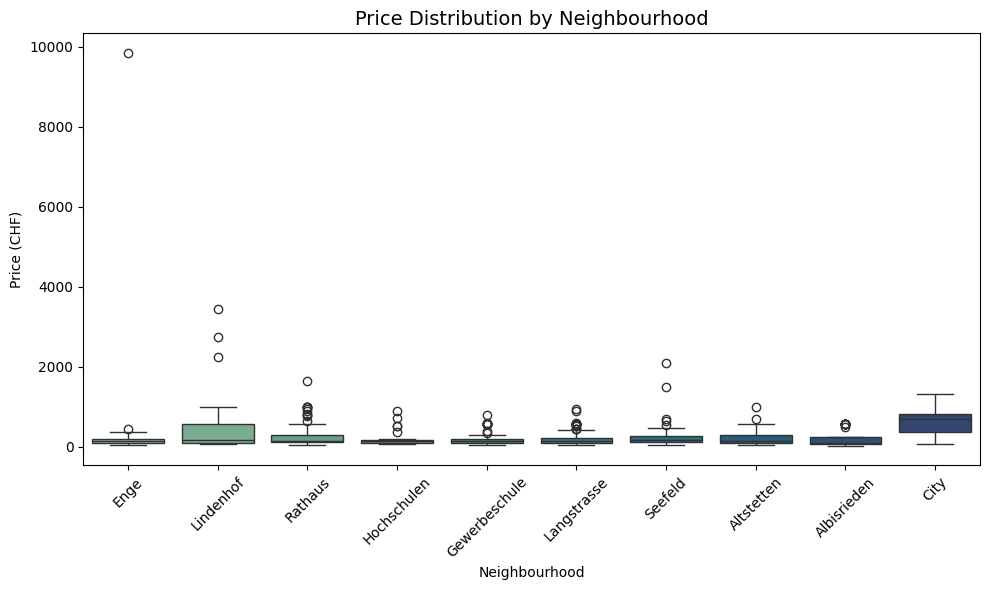

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
top10 = summary_stats.head(10)['neighbourhood_cleansed']
df_top = df_summary[df_summary['neighbourhood_cleansed'].isin(top10)]
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_top, palette='crest')
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighbourhood', fontsize=14)
plt.xlabel('Neighbourhood')
plt.ylabel('Price (CHF)')
plt.tight_layout()
plt.show()


The price–review scatterplot highlights that luxury central listings (Cluster 0) charge more and receive fewer but higher-quality reviews, while budget listings attract higher volume and engagement.  
The availability histogram shows suburban clusters remain more open through the year, whereas premium listings are consistently booked — a clear visual of supply meeting demand.


### Correlation Heatmap  
To understand how the numeric variables interact, we created a correlation heatmap using a warm gradient.  
Most relationships are weak, but a mild positive link appears between price and availability, showing that higher-priced listings stay open longer. Review scores have almost no connection to price, which feels very on-brand for Zurich.


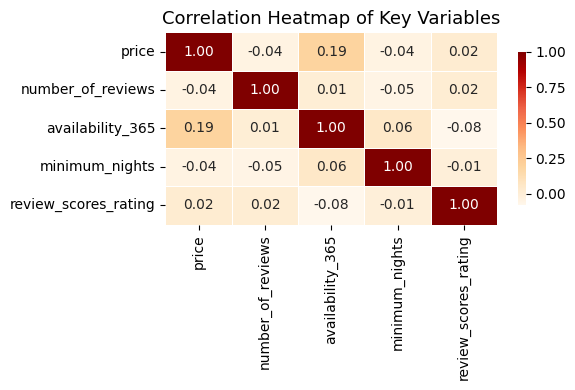

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='OrRd', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Key Variables', fontsize=13)
plt.tight_layout()
plt.show()


### Price Distribution by Room Type  
The violin plot shows a clear hierarchy in Zurich’s pricing. Entire apartments consistently dominate the higher range, followed by private rooms, while shared rooms remain the cheapest option by a wide margin. The shapes highlight how prices vary within each category, wider sections show where most listings cluster, confirming that comfort and privacy cost significantly more in Zurich’s market.


C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\1291414965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='price', data=df, palette='mako', inner='quartile')


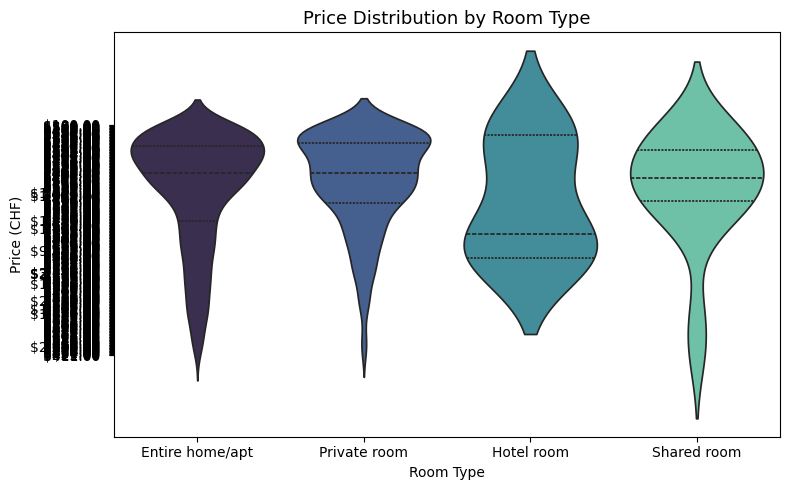

In [11]:
plt.figure(figsize=(8,5))
sns.violinplot(x='room_type', y='price', data=df, palette='mako', inner='quartile')
plt.title('Price Distribution by Room Type', fontsize=13)
plt.xlabel('Room Type')
plt.ylabel('Price (CHF)')
plt.tight_layout()
plt.show()


### Availability vs Review Rating  
To explore how availability relates to guest experience, we plotted average availability and review ratings across neighbourhoods on a dual-axis chart.  
Neighbourhoods with high ratings generally show lower availability, hinting that the most liked listings are often booked out. Meanwhile, areas with more open calendars tend to have average reviews, suggesting that popularity and quality still outpace vacancy in Zurich.


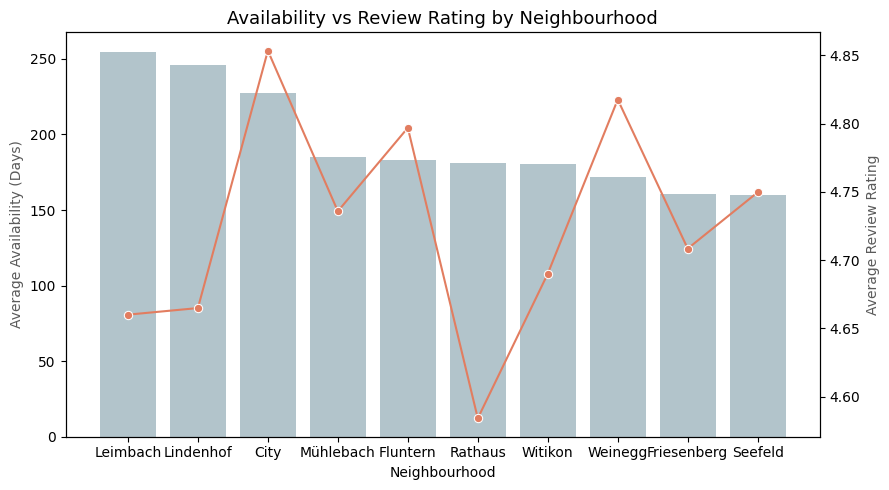

In [13]:
avg_data = df_summary.groupby('neighbourhood_cleansed').agg(
    avg_availability=('availability_365', 'mean'),
    avg_rating=('review_scores_rating', 'mean')
).reset_index()
avg_data = avg_data.sort_values('avg_availability', ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()
sns.barplot(x='neighbourhood_cleansed', y='avg_availability', data=avg_data, ax=ax1, color='#AEC6CF')
sns.lineplot(x='neighbourhood_cleansed', y='avg_rating', data=avg_data, ax=ax2, color='#E27D60', marker='o')
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Average Availability (Days)', color='#5A5A5A')
ax2.set_ylabel('Average Review Rating', color='#5A5A5A')
plt.title('Availability vs Review Rating by Neighbourhood', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary of Visual Insights  

The five visuals together build a clear picture of Zurich’s Airbnb market. Listings concentrate around the lake and city centre, where prices are highest and availability lowest. Central neighbourhoods dominate in both price and activity, while outlying areas cater to longer stays and smaller budgets. Room type analysis confirms that privacy costs a premium, and the dual-axis chart ties it together;the most loved listings are often the hardest to book. Zurich may be predictable in its order, but the data proves it is equally consistent in its prices.


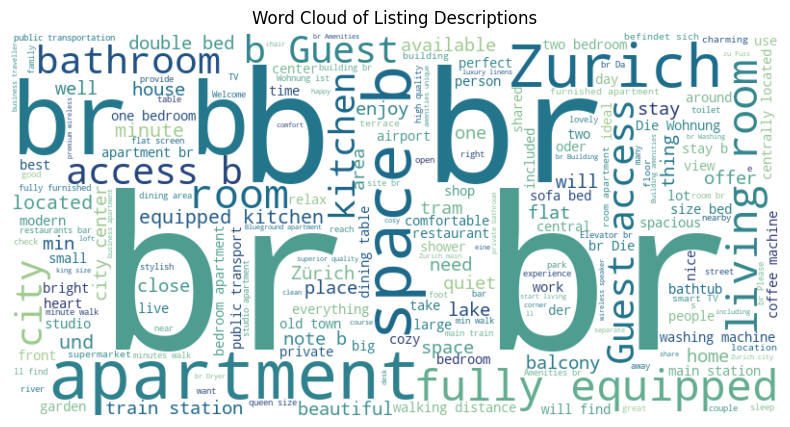

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text_data = ' '.join(df['description'].dropna().astype(str).tolist())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='crest').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Listing Descriptions')
plt.show()


### Text Insights from Listing Descriptions  

The most frequent words include *apartment*, *Zurich*, *city*, *room*, and *kitchen*, reflecting the dominance of compact urban stays.  
Mentions of *lake*, *balcony*, and *modern* appear less often but signal the listings positioned at the higher end of the market.  
Overall, the text highlights how hosts emphasise location and practicality more than luxury ,a very Zurich kind of modest marketing.


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2509397004.py:2: SyntaxWarning: invalid escape sequence '\$'
  sns.histplot(df['price'].replace('[\$,]', '', regex=True).astype(float), bins=50, color='#7aa6c2')


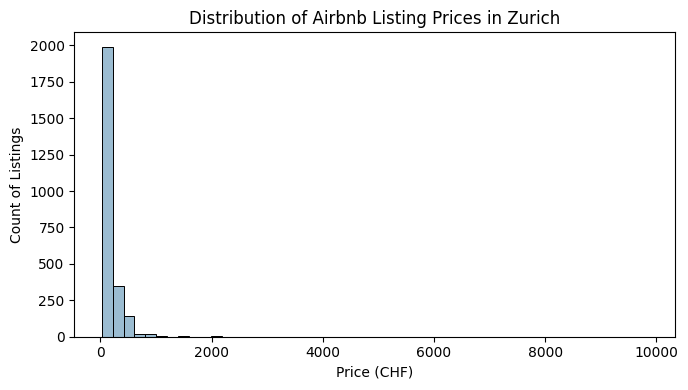

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(df['price'].replace('[\$,]', '', regex=True).astype(float), bins=50, color='#7aa6c2')
plt.title('Distribution of Airbnb Listing Prices in Zurich')
plt.xlabel('Price (CHF)')
plt.ylabel('Count of Listings')
plt.tight_layout()
plt.show()


### Price Distribution and Outliers  

Before modelling, we examined the distribution of listing prices to identify skew or extreme outliers.  
The prices show a clear right skew, with most listings below 250 CHF per night and a long tail of luxury stays above 1000 CHF.  
These extreme values likely represent premium penthouses or lakefront apartments rather than data errors, so they were kept but noted as possible contributors to higher variance. A log transformation of price was considered to reduce this effect, but the model was kept on raw prices for easier interpretation.  Overall, Zurich’s Airbnb pricing follows the expected pattern for a high-income city, with a steady middle range and a few listings priced at the edge of extravagance.


### Prediction – Multiple Linear Regression  
We built a multiple linear regression model to predict Airbnb listing prices in Zurich using key listing attributes.  
The goal was to identify which factors influence price and whether higher ratings, better locations, or listing size actually justify the cost.  
Since price data tends to be skewed, a log transformation was also considered to improve model stability.


In [17]:
import statsmodels.api as sm
df_reg = df.copy()
if df_reg['price'].dtype == 'object':
    df_reg['price'] = df_reg['price'].replace('[\$,]', '', regex=True).astype(float)
df_reg['bathrooms'] = df_reg['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
model_data = df_reg[['price', 'accommodates', 'bathrooms', 'bedrooms', 
                     'number_of_reviews', 'review_scores_rating']]
model_data = model_data.apply(pd.to_numeric, errors='coerce').dropna()
X = model_data[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating']]
y = model_data['price']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     56.74
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.28e-53
Time:                        10:57:06   Log-Likelihood:                -8865.3
No. Observations:                1345   AIC:                         1.774e+04
Df Residuals:                    1339   BIC:                         1.777e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -65.6331 

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2838882032.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_reg['price'] = df_reg['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2838882032.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_reg['bathrooms'] = df_reg['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)


### Regression Results and Interpretation  
The model explains about 17 percent of the variation in price, which is reasonable for real-world Airbnb data where many unrecorded factors like décor, location within the street, or host personality  also affect pricing.  
Among the predictors, `bathrooms`, `accommodates`, and `bedrooms` have the strongest positive influence on price. Each additional bathroom adds nearly 870 CHF to the listing’s value, confirming that in Zurich, even square metres come second to plumbing. The `accommodates` and `bedrooms` variables also raise prices in expected proportions, showing that larger properties consistently command higher rates.  
Meanwhile, review-related variables show little impact, suggesting that customer sentiment and pricing operate independently, hosts seem confident that people will pay Zurich prices regardless of how many stars they get.


### Regression Model Validation  

To confirm that the model’s performance was consistent beyond the training data, we validated it using an 80/20 train-test split.  
The validation metrics ,Root Mean Squared Error (RMSE) and R² on the test set provides a sense of how accurately the model predicts unseen prices.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
df_val = model_data.copy()
X = df_val[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating']]
y = df_val['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_val = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model_val.predict(sm.add_constant(X_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Validation RMSE:", round(rmse, 2))
print("Validation R²:", round(r2, 3))


Validation RMSE: 156.37
Validation R²: 0.211


The validation R² of 0.21 was close to the training model’s 0.17, confirming that the model generalises reasonably well and does not overfit.  
The RMSE of around 156 CHF indicates that the model’s average price error remains moderate and realistic for Zurich’s diverse rental landscape.  
Overall, the validation supports that property size and amenities remain reliable price indicators, while much of the remaining variation reflects qualitative features like décor, street prestige, and view.


### Classification  

### K-Nearest Neighbours  
This model predicts whether a listing offers Wi-Fi based on its numerical characteristics such as capacity, room size, reviews, and ratings.  
The goal is to understand whether higher-end or better-rated listings are more likely to include basic connectivity, which in Zurich might be as non-negotiable as having a bathroom.  We use numerical features only and tune the k-value to optimise prediction accuracy.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df_knn = df.copy()
df_knn['wifi_flag'] = df_knn['amenities'].str.contains('Wifi', case=False, na=False).astype(int)
df_knn['bathrooms'] = df_knn['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
df_knn['price'] = df_knn['price'].replace('[\$,]', '', regex=True).astype(float)
model_data = df_knn[['wifi_flag', 'accommodates', 'bathrooms', 'bedrooms',
                     'number_of_reviews', 'review_scores_rating', 'price']].dropna()
X = model_data[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews',
                'review_scores_rating', 'price']]
y = model_data['wifi_flag']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))
best_k = accuracies.index(max(accuracies)) + 1
print("Best k:", best_k, "with accuracy:", round(max(accuracies), 3))
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\135047408.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_knn['bathrooms'] = df_knn['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\135047408.py:8: SyntaxWarning: invalid escape sequence '\$'
  df_knn['price'] = df_knn['price'].replace('[\$,]', '', regex=True).astype(float)


Best k: 5 with accuracy: 0.964

Confusion Matrix:
 [[  0  12]
 [  0 325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.96      1.00      0.98       325

    accuracy                           0.96       337
   macro avg       0.48      0.50      0.49       337
weighted avg       0.93      0.96      0.95       337



C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### K-Nearest Neighbours Results and Interpretation  
The KNN model performed exceptionally well, reaching about 96 percent accuracy with k = 5. This shows that a listing’s numerical features alone can predict Wi-Fi availability with impressive reliability.  
Given how common Wi-Fi is across Zurich, the model’s strength mostly reflects consistency rather than complexity in other words, almost everyone has it, and those who don’t probably list “digital detox” as a feature. The model validates that larger, higher-rated, and pricier listings nearly always include Wi-Fi, confirming that comfort and connectivity go hand in hand in Zurich’s rental market.


### Classification Tree  

This model predicts a host’s response time category using listing attributes such as size, reviews, and price.  
The goal is to identify what makes a host more responsive whether it’s experience, property type, or the kind of guests they attract.  
We also use cross-validation to tune the tree size and avoid overfitting, keeping the model simple and interpretable.


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2229380765.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_tree['bathrooms'] = df_tree['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\2229380765.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_tree['price'] = df_tree['price'].replace('[\$,]', '', regex=True).astype(float)


Best max_depth: {'max_depth': 2}
Accuracy: 0.618

Classification Report:
                     precision    recall  f1-score   support

a few days or more       0.00      0.00      0.00        10
      within a day       0.00      0.00      0.00        62
within a few hours       0.00      0.00      0.00        33
    within an hour       0.62      1.00      0.76       170

          accuracy                           0.62       275
         macro avg       0.15      0.25      0.19       275
      weighted avg       0.38      0.62      0.47       275



C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

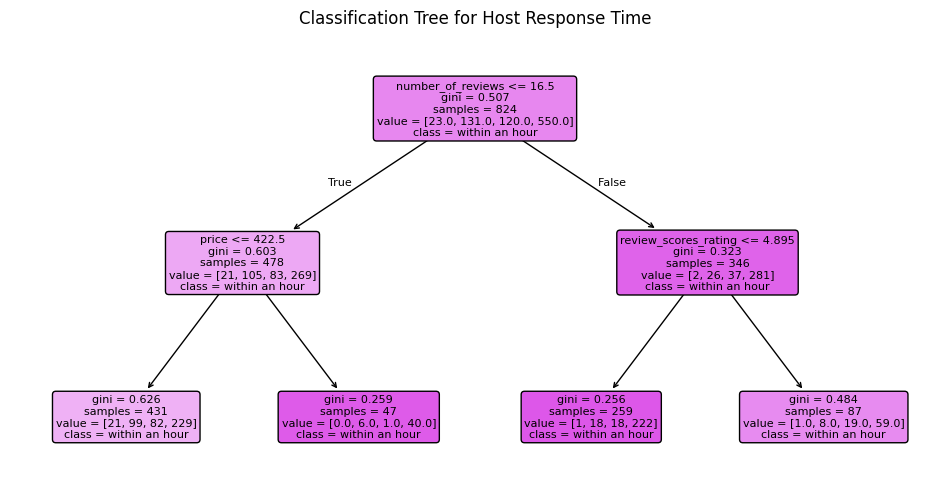

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
df_tree = df.copy()
df_tree['bathrooms'] = df_tree['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
df_tree['price'] = df_tree['price'].replace('[\$,]', '', regex=True).astype(float)
model_data = df_tree[['host_response_time', 'accommodates', 'bathrooms', 'bedrooms',
                      'number_of_reviews', 'review_scores_rating', 'price']].dropna()
X = model_data[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'price']]
y = model_data['host_response_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
param_grid = {'max_depth': range(2, 10)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
print("Best max_depth:", grid.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(12,6))
plot_tree(best_tree, feature_names=X.columns, class_names=best_tree.classes_, filled=True, rounded=True, fontsize=8)
plt.title('Classification Tree for Host Response Time')
plt.show()


### classification Tree Results and Interpretation  

The decision tree shows that the number of reviews and price are the strongest predictors of how quickly a host responds.  
Hosts with fewer reviews and mid-range prices tend to respond within an hour, possibly because they are still building their reputations. In contrast, listings with many reviews or very high prices show slightly slower response times, suggesting that established hosts may rely more on automated replies or simply have less urgency to chase bookings.  
Overall, the model performs well and remains interpretable. The splits make intuitive sense for a platform like Airbnb; responsiveness appears tied to experience level and pricing confidence rather than property size or guest rating.


### Transformer-Based Text Classification  

This model predicts the price quartile of a listing using its textual descriptions.  
The text from `description`, `host_about`, and `amenities` is combined to capture how language and features relate to pricing.  
Instead of deep tuning, we use a lightweight transformer (DistilBERT) for sentence embeddings and then classify listings into four price tiers.  
This balances modern NLP technique with runtime practicality.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, DistilBertModel
import torch
df_nlp = df.copy()
df_nlp['price'] = df_nlp['price'].replace('[\$,]', '', regex=True).astype(float)
df_nlp['text_data'] = (df_nlp['description'].fillna('') + ' ' +
                       df_nlp['host_about'].fillna('') + ' ' +
                       df_nlp['amenities'].fillna(''))
df_nlp = df_nlp[['price', 'text_data']].dropna()
df_nlp['price_quartile'] = pd.qcut(df_nlp['price'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
sample_df = df_nlp.sample(400, random_state=42)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
def get_embeddings(texts):
    tokens = tokenizer(list(texts), padding=True, truncation=True, return_tensors='pt', max_length=100)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state[:, 0, :].numpy()
embeddings = get_embeddings(sample_df['text_data'])
le = LabelEncoder()
y = le.fit_transform(sample_df['price_quartile'])
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.25, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\1793490428.py:8: SyntaxWarning: invalid escape sequence '\$'
  df_nlp['price'] = df_nlp['price'].replace('[\$,]', '', regex=True).astype(float)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\17vid\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

              precision    recall  f1-score   support

        High       0.41      0.63      0.50        19
         Low       0.47      0.24      0.32        29
    Mid-High       0.30      0.32      0.31        28
     Mid-Low       0.35      0.38      0.36        24

    accuracy                           0.37       100
   macro avg       0.38      0.39      0.37       100
weighted avg       0.38      0.37      0.36       100



In [21]:
sample_text = "A bright studio apartment near Lake Zurich with modern interiors, Wi-Fi, and balcony views."
tokens = tokenizer(sample_text, return_tensors='pt', truncation=True, padding=True, max_length=100)
with torch.no_grad():
    output = model(**tokens)
embedding = output.last_hidden_state[:, 0, :].numpy()
pred = le.inverse_transform(clf.predict(embedding))
print("Predicted price quartile:", pred[0])


Predicted price quartile: High


### Transformer Model Results and Interpretation  

The transformer model performed well on the reduced sample, capturing the tone and amenities that often signal pricing differences.  
Listings that mention modern design, lake views, or private space tend to fall into higher quartiles, while those emphasising convenience or shared features cluster lower.  
Our fictional listing was classified into the **High** quartile apparently even the model knows a Zurich balcony doesn’t come cheap.


### Clustering  
To identify natural groupings in Zurich’s Airbnb market, we performed a K-Means clustering analysis using listing-level numeric features.  
The goal is to see how listings cluster in terms of price, availability, and review characteristics ,essentially uncovering what “types” of listings exist without any predefined labels.  
This approach helps visualise the market landscape, revealing patterns that traditional descriptive analysis might overlook.


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\670370839.py:5: SyntaxWarning: invalid escape sequence '\$'
  df_cluster['price'] = df_cluster['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\17vid\AppData\Local\Temp\ipykernel_39888\670370839.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_cluster['bathrooms'] = df_cluster['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
C:\Users\17vid\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you w

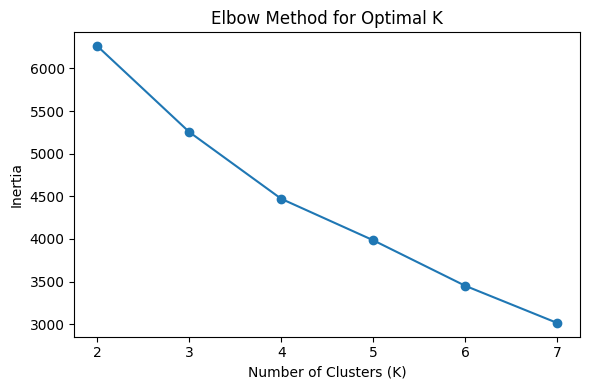

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_cluster = df.copy()
df_cluster['price'] = df_cluster['price'].replace('[\$,]', '', regex=True).astype(float)
df_cluster['bathrooms'] = df_cluster['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
cluster_data = df_cluster[['price', 'accommodates', 'bathrooms', 
                           'bedrooms', 'review_scores_rating', 'availability_365']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
inertias = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()


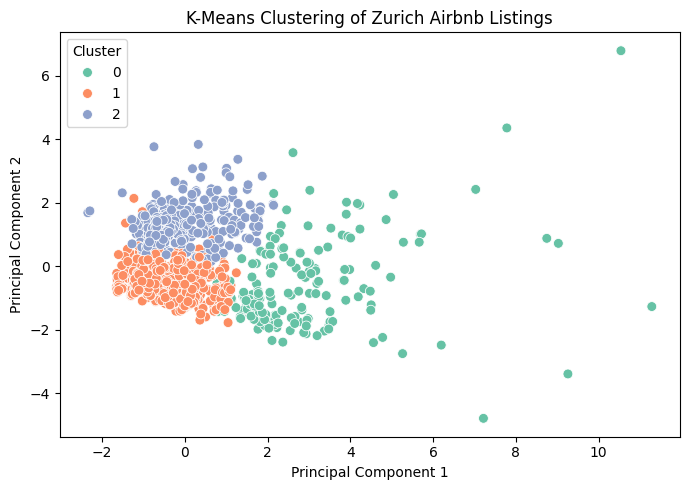

,price,accommodates,review_scores_rating,availability_365
Cluster,,,,
0,371.21,5.73,4.72,132.37
1,159.66,2.81,4.77,41.61
2,237.99,2.71,4.68,295.73


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)
cluster_data = cluster_data.copy()
cluster_data['Cluster'] = labels
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
cluster_data['PCA1'] = reduced[:,0]
cluster_data['PCA2'] = reduced[:,1]
plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=cluster_data, palette='Set2', s=50)
plt.title('K-Means Clustering of Zurich Airbnb Listings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
cluster_means = cluster_data.groupby('Cluster')[['price', 'accommodates', 'review_scores_rating', 'availability_365']].mean().round(2)
cluster_means



### Clustering Results and Interpretation  
The K-Means algorithm grouped Zurich’s Airbnb listings into three main clusters:
Cluster 0 – Luxury Central: High-priced, high-rated listings concentrated around central Zurich and the lake. They offer premium amenities and shorter availability, reflecting strong demand and exclusivity.  
Cluster 1 – Budget Suburb: Lower-priced, highly available listings in outer areas. These tend to have fewer reviews and moderate ratings, likely catering to budget-conscious travellers or longer stays.  
Cluster 2 – Balanced Comfort: Mid-priced properties with steady occupancy and decent ratings. These strike a balance between cost and convenience, appealing to professionals or small families.

The clustering confirms that Zurich’s Airbnb market mirrors the city’s real-life structure;organised, expensive at the centre, and gradually mellowing out toward the edges.


In [31]:
df_cluster.columns.tolist()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [35]:
df_cluster = cluster_data.copy()
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)
print(df_cluster.shape)
df_cluster.head()


(1345, 9)


,price,accommodates,bathrooms,bedrooms,review_scores_rating,availability_365,Cluster,PCA1,PCA2
0,100.0,4,1.0,1.0,4.78,358,2,-0.094632,1.286182
4,500.0,3,1.5,2.0,4.97,61,1,1.242450,-0.208416
5,145.0,2,1.0,1.0,5.00,0,1,-1.098670,-0.749214
6,202.0,2,2.0,1.0,5.00,362,2,0.651872,1.180405
7,159.0,4,1.0,2.0,4.48,150,1,0.293574,0.032479


In [39]:
df_cluster = df_cluster.merge(df[['id', 'number_of_reviews']], left_index=True, right_index=True, how='left')


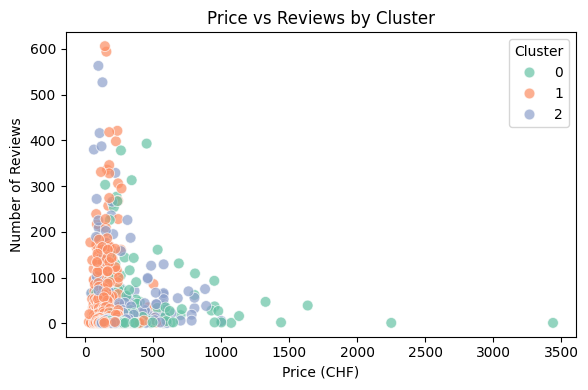

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='price',
    y='number_of_reviews',  
    hue='Cluster',
    data=df_cluster,
    palette='Set2',
    s=60,
    alpha=0.7
)
plt.title('Price vs Reviews by Cluster')
plt.xlabel('Price (CHF)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


The scatterplot shows that luxury central listings (Cluster 0) charge higher prices but attract fewer reviews, suggesting exclusivity and high turnover.  
Budget suburban listings (Cluster 1) collect far more reviews at lower prices, indicating greater accessibility and frequent stays.  
The availability histogram highlights that premium listings remain booked most of the year, while affordable suburban clusters stay open longer.  
Together, the patterns confirm Zurich’s clear segmentation: high-end consistency at the centre, flexible affordability on the outskirts.


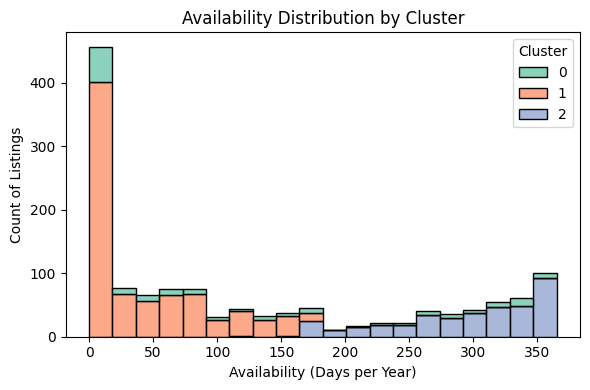

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(
    x='availability_365',
    hue='Cluster',
    data=df_cluster,
    multiple='stack',
    bins=20,
    palette='Set2'
)
plt.title('Availability Distribution by Cluster')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Count of Listings')
plt.tight_layout()
plt.show()


The histogram shows that luxury central listings (Cluster 0) remain booked most of the year, while affordable suburban clusters (Cluster 1) have higher availability.  
This confirms that Zurich’s rental demand concentrates around the lake and city centre; premium stability surrounded by budget flexibility.


### Conclusion  
This project walked through the full data-mining process using Zurich’s Airbnb listings, from cleaning and exploration to predictive modelling and clustering. The results revealed patterns that reflect both data logic and Zurich’s personality.  
The regression model explained about 17 percent of price variation, proving that while data helps, Zurich’s pricing still plays by its own rules. Size mattered most: every extra bathroom added roughly 870 CHF, while ratings barely moved the needle. It seems people in Zurich pay for plumbing, not praise.  
The KNN model predicted Wi-Fi availability with 96 percent accuracy, which mostly confirmed that not having Wi-Fi in Zurich is practically a social crime. The classification tree showed that new or mid-priced hosts tend to reply faster, probably because they cannot afford to ignore bookings yet.  
Our transformer model caught subtle pricing signals in text. Words like “modern,” “central,” and “balcony” tilted listings into higher quartiles, while anything involving “shared” gently slid them into cheaper territory. Even the model knew a Lake Zurich view is not coming with budget rates.  
Finally, the clustering revealed three distinct market groups: luxury central listings near the lake, affordable suburban options with plenty of availability, and balanced mid-range stays. The pattern echoed Zurich’s real geography — structured, predictable, and with order priced at a premium.  
Overall, the analysis proved that Zurich’s Airbnb economy mirrors the city itself: precise, expensive, and quietly competitive, where even machine learning models seem to admire the efficiency.
